In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
# Load dataset
df = pd.read_csv('Google_Stock_Train (2010-2022).csv')  # Make sure this file contains 'Date' and 'Close' columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
# Use only the 'Close' price
data = df['Close'].values
data = data.reshape(-1, 1)

In [8]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [9]:
# Prepare training data
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

In [11]:
# Reshape input to [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [12]:
# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [15]:
# Build RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0035
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.8882e-05
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.5452e-05
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3685e-05
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.9718e-05
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5782e-05
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.9233e-05
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3758e-05 
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.2597e-05
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6610e-05


In [17]:
# Predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


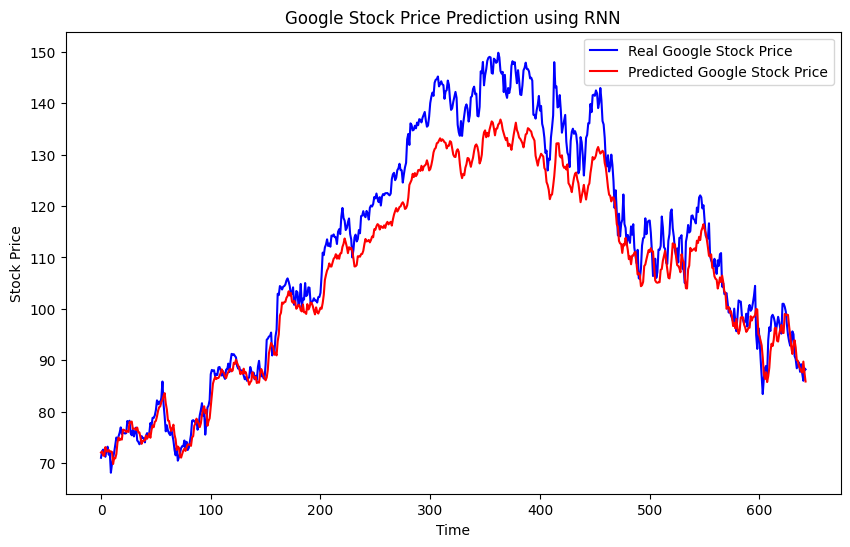

In [18]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='blue', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

🧠 How the Code Uses RNN
Even though the code does not directly mention "RNN", it uses Recurrent Neural Network (RNN) concepts by implementing LSTM layers, which are an advanced type of RNN.

🔄 What is an RNN?
Recurrent Neural Networks (RNNs) are designed to handle sequential data, such as time series or natural language. Unlike traditional neural networks, RNNs have memory—they pass information (hidden states) from one step to the next in the sequence, allowing them to learn temporal dependencies.

However, basic RNNs struggle with long-term dependencies due to the vanishing/exploding gradient problem.

🔒 What is LSTM (Long Short-Term Memory)?
LSTM is a special type of RNN that introduces:

Memory Cells: Maintain information over long sequences.
Gates: Control the flow of information (input gate, forget gate, output gate).
LSTMs effectively solve the vanishing gradient problem and are widely used in:

Stock price prediction
Language modeling
Speech recognition
Weather forecasting

🔍 How LSTM Implements RNN in the Code
Your model uses LSTM layers like this:

regressor.add(LSTM(units=50, return_sequences=True))
This means:

The model processes sequences of 60 days of stock prices.
It remembers previous steps and learns from them.
It models temporal dependencies using recurrent behavior.
The input is reshaped as:

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
Which gives the shape (samples, time steps, features) — the required input for any RNN/LSTM-based architecture.

🏗️ Stacked LSTM = Deep RNN
You use 4 LSTM layers, which means you're building a deep RNN architecture that can learn complex patterns at different levels:

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
...
The output of one LSTM is passed to the next, allowing the model to capture both short-term and long-term dependencies.

📊 Conceptual Flow of the Model
[Price_t-60, ..., Price_t-1] 
       ↓
    LSTM Layer 1
       ↓
    LSTM Layer 2
       ↓
    LSTM Layer 3
       ↓
    LSTM Layer 4
       ↓
    Dense Layer (Output)
       ↓
 Predicted Price_t